In [1]:
# Lab Data Cleaning Wrangling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os 
import math 
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

from datetime import datetime

In [3]:
customer_df = pd.read_csv ("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
cols = [col_name.lower().replace(" ", "_") for col_name in customer_df.columns]
customer_df.columns = cols
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [5]:
def get_region(state):
    for state in customer_df["state"]:
        west = ["Washington", "Oregon", "California", "Nevada", "Arizona", "New Mexico", "Idaho", "Montana", "Wyoming", "Colorado", "Utah"]
        midwest = ["North Dakota", "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri", "Wisconsin", "Illinois", "Indiana", "Michigan", "Ohio"]
        northeast = ["Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", "New York", "New Jersey", "Pennsylvania"]
        south = ["Delaware", "Maryland", "Virginia", "West Virginia", "Kentucky", "Tennessee", "North Carolina", "South Carolina", "Georgia", "Florida", "Alabama", "Mississippi", "Arkansas", "Louisiana", "Texas", "Oklahoma"]
        if state in west:
            return "West"
        elif state in midwest:
            return "Midwest"
        elif state in northeast:
            return "Northeast"
        elif state in south:
            return "South"
        else:
            return "Unknown"
    return customer_df["state"]

In [6]:
customer_df["region"] = customer_df["state"].apply(get_region)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,region
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,West
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,West
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,West
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,West
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,West


In [7]:
customer_df["state"].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [8]:
customer_df["region"].value_counts()

West    9134
Name: region, dtype: int64

In [9]:
# Did the function just to check if it was useful or not... but there are only 5 states, so i'll leave it that way

In [10]:
# 5 The time variable can be useful. i did it here

In [11]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"])
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,region
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,West
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,West
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,West
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,West
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,West


In [12]:
customer_df['year'] = customer_df['effective_to_date'].dt.year
customer_df['month'] = customer_df['effective_to_date'].dt.month
customer_df['day'] = customer_df['effective_to_date'].dt.day
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,region,year,month,day
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,West,2011,2,24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,West,2011,1,31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,West,2011,2,19
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,West,2011,1,20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,West,2011,2,3


In [13]:
customer_df["year"].value_counts()

2011    9134
Name: year, dtype: int64

In [14]:
customer_df["month"].value_counts()

1    4898
2    4236
Name: month, dtype: int64

In [15]:
customer_df["day"].value_counts()

27    361
10    356
26    350
19    347
14    338
3     336
28    330
5     325
11    317
17    316
2     309
7     308
21    308
20    305
18    303
1     302
25    300
23    298
22    294
6     287
24    286
13    284
15    283
8     283
9     283
12    282
16    281
4     279
31    178
29    160
30    145
Name: day, dtype: int64

In [16]:
customer_df["number_of_open_complaints"].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [17]:
# dropping customer (no statistical significance), effective to date (already transformed it), year (only 2011)
# and month (just january and february), region (just WEST)
customer_df = customer_df.drop(["customer","effective_to_date", "year", "month", "region"], axis=1)
customer_df.head(1)

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24


In [18]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9134 non-null   object 
 1   customer_lifetime_value        9134 non-null   float64
 2   response                       9134 non-null   object 
 3   coverage                       9134 non-null   object 
 4   education                      9134 non-null   object 
 5   employmentstatus               9134 non-null   object 
 6   gender                         9134 non-null   object 
 7   income                         9134 non-null   int64  
 8   location_code                  9134 non-null   object 
 9   marital_status                 9134 non-null   object 
 10  monthly_premium_auto           9134 non-null   int64  
 11  months_since_last_claim        9134 non-null   int64  
 12  months_since_policy_inception  9134 non-null   i

In [19]:
num_customer = customer_df.select_dtypes(include = ("float64", "int64"))
num_customer.head(1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day
0,2763.519279,56274,69,32,5,0,1,384.811147,24


In [21]:
cat_customer = customer_df.select_dtypes(include = "object")
cat_customer.head(1)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize


In [22]:
# 1. Remove outliers 

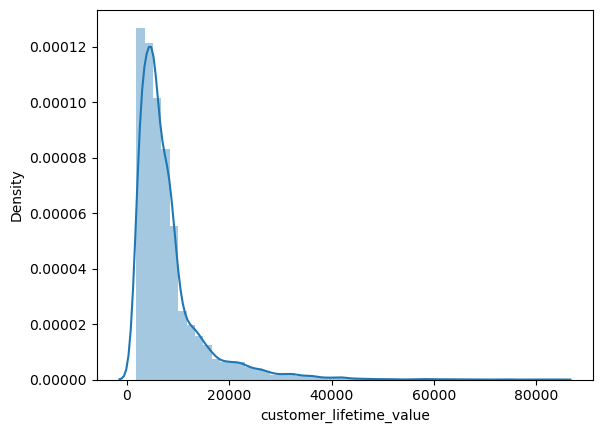

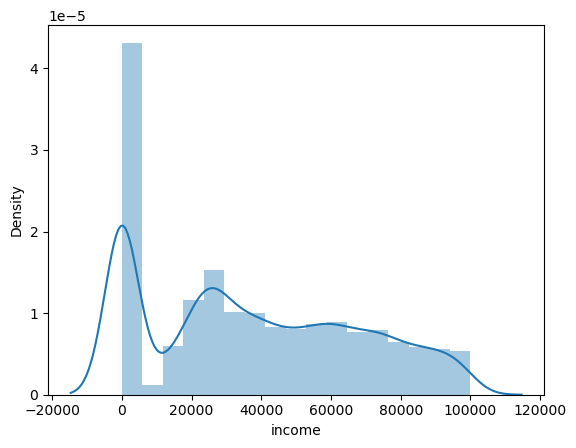

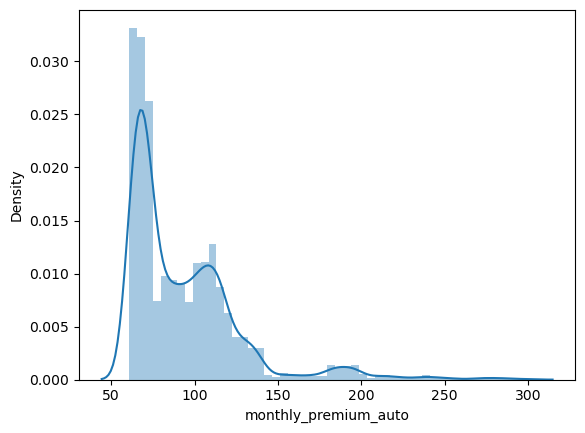

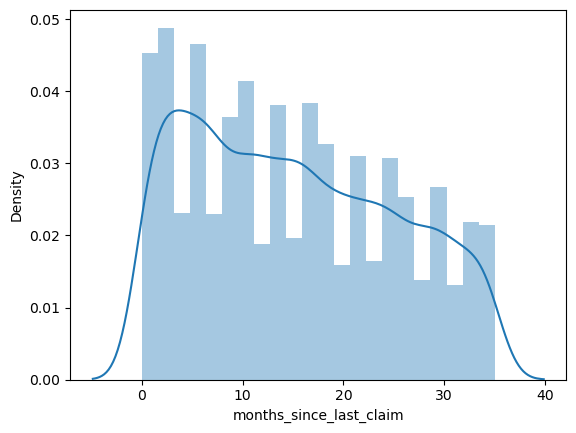

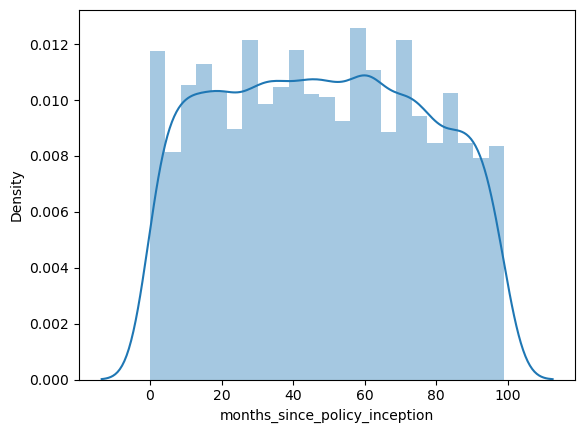

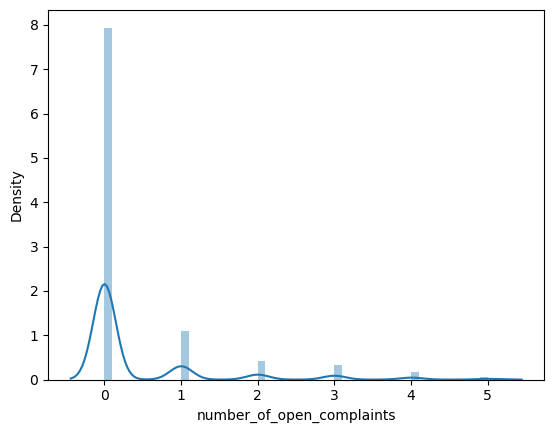

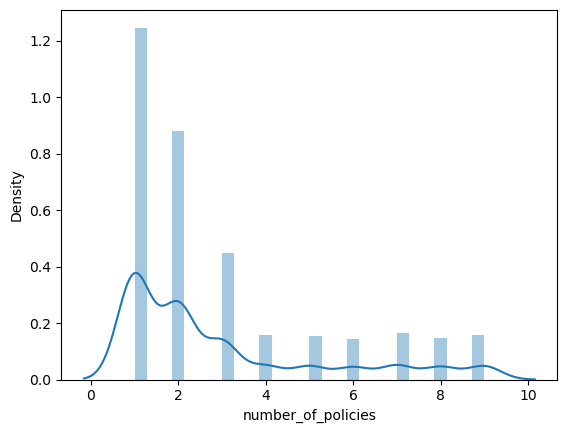

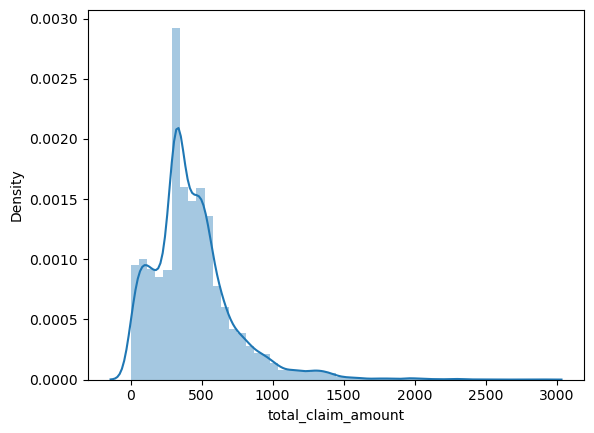

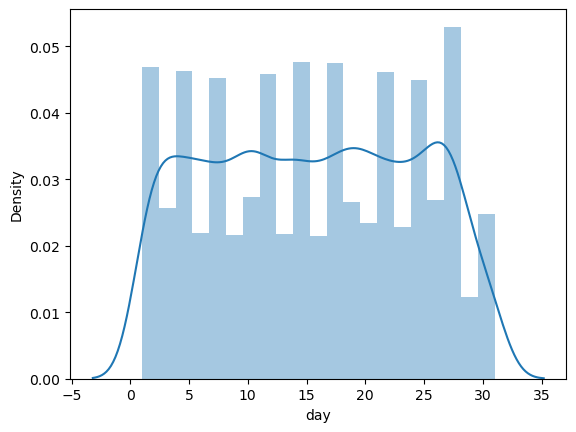

In [23]:
for column in num_customer.columns:
    sns.distplot(num_customer[column])
    plt.show()

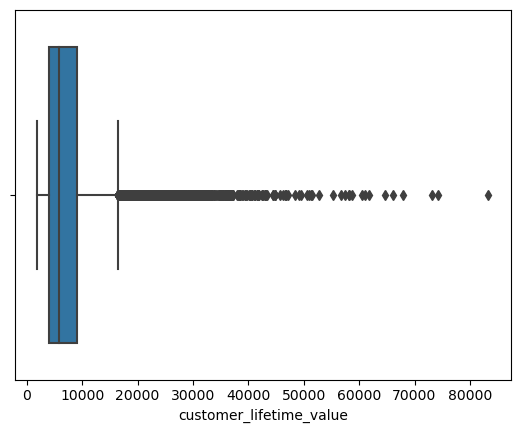

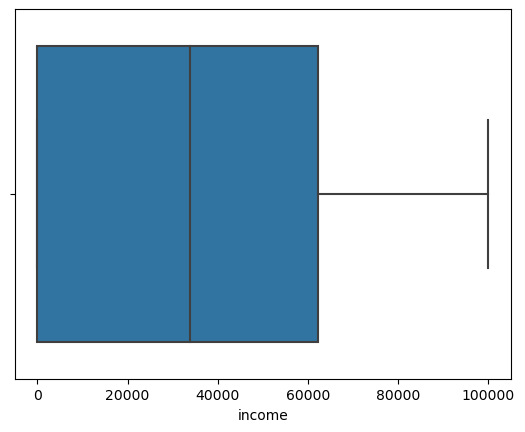

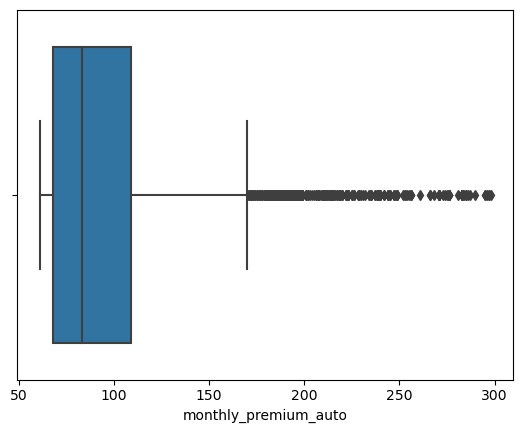

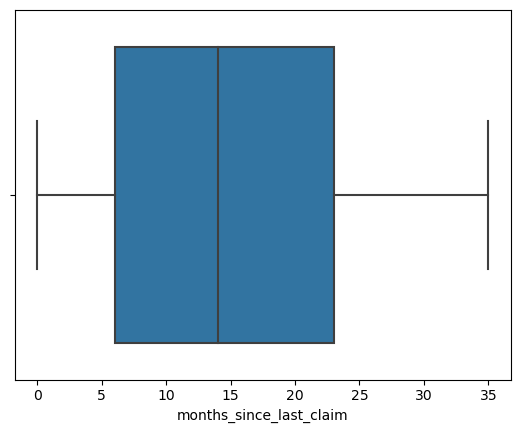

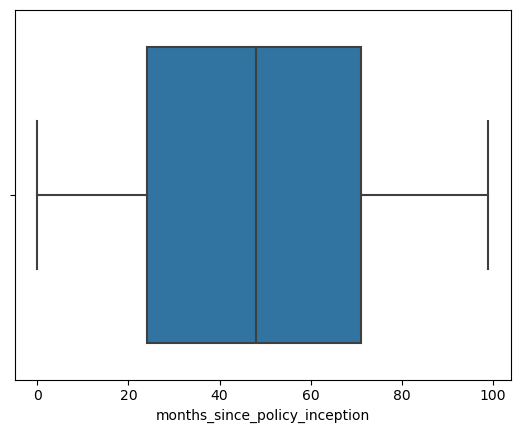

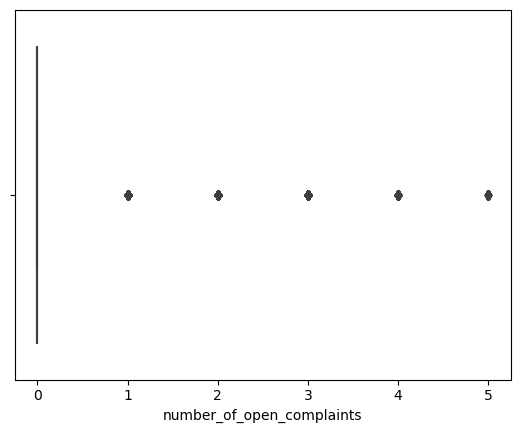

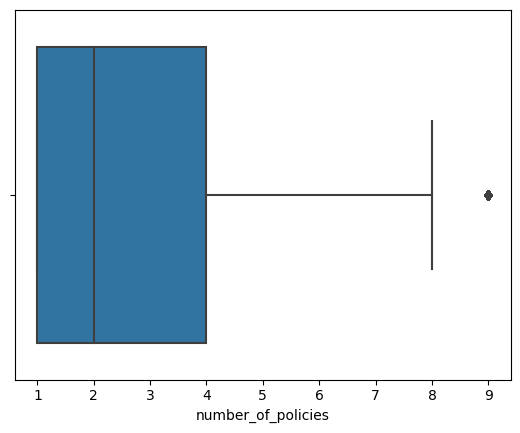

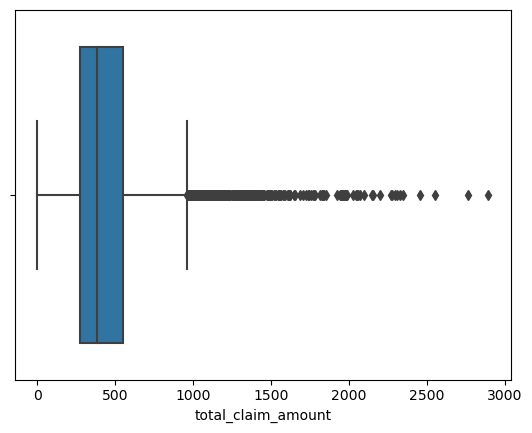

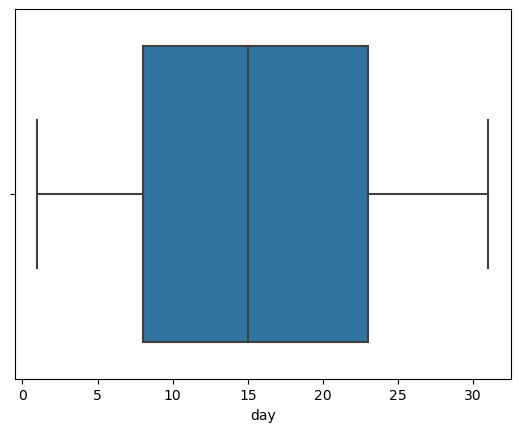

In [24]:
for column in num_customer.columns:
    sns.boxplot(num_customer[column])
    plt.show()

In [25]:
def outlier_removal(customer_df):      
    for column in customer_df.select_dtypes(include=[np.number]):
        Q1 = customer_df[column].quantile(0.25)
        Q3 = customer_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        customer_df = customer_df[(customer_df[column] >= lower_bound) & (customer_df[column] <= upper_bound)]
    return customer_df

In [26]:
df = outlier_removal(customer_df)

In [27]:
df.shape # comparing to customer_df.shape 9134 rows ---> 3246 rows deleted

(5888, 23)

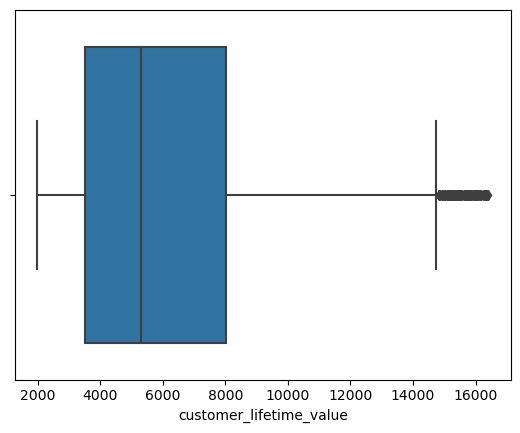

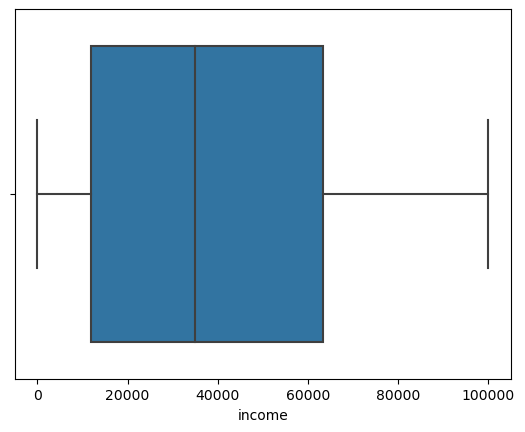

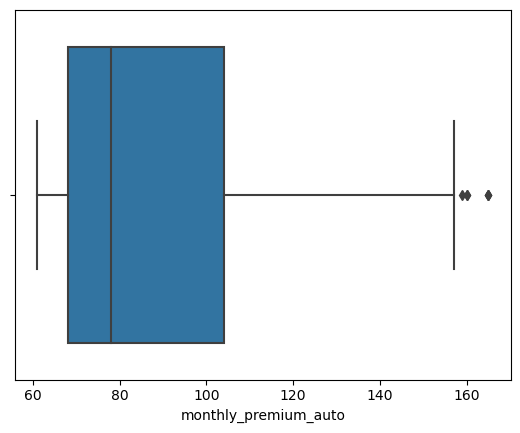

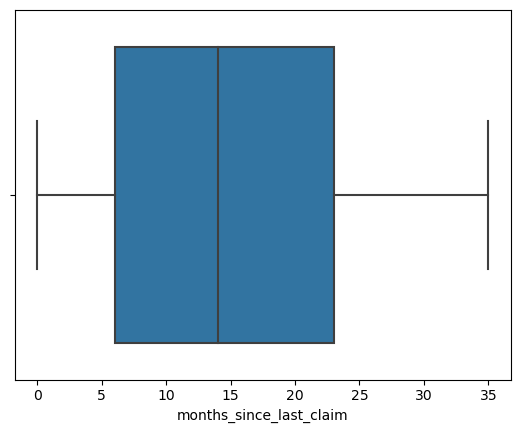

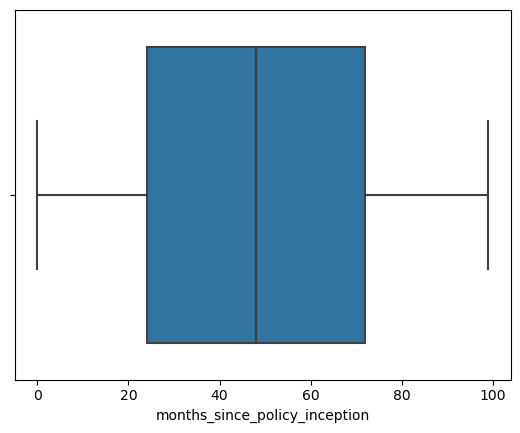

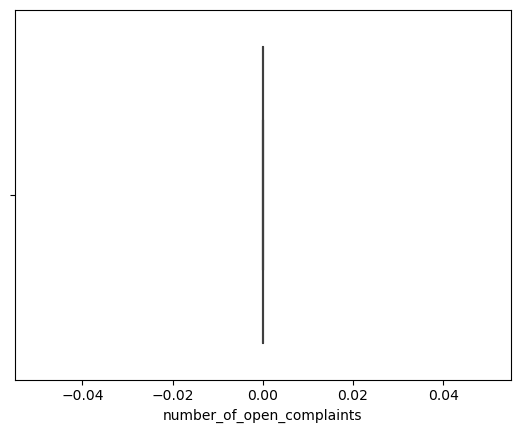

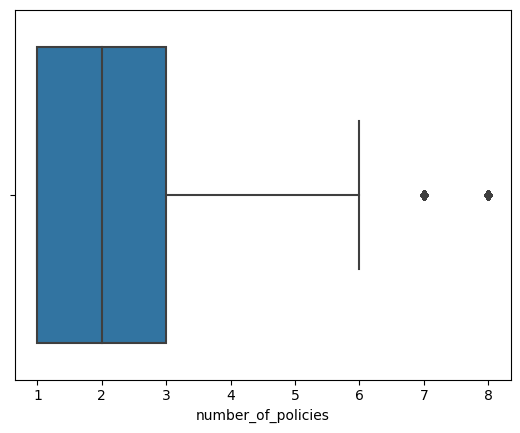

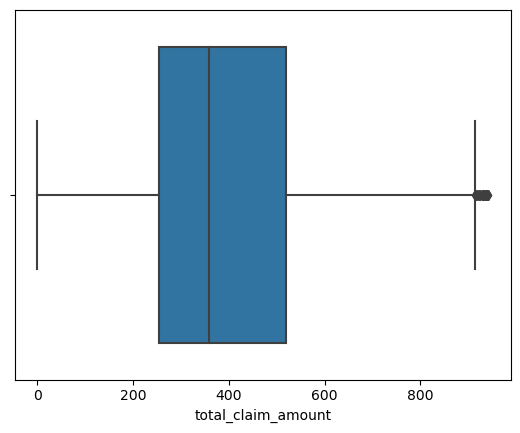

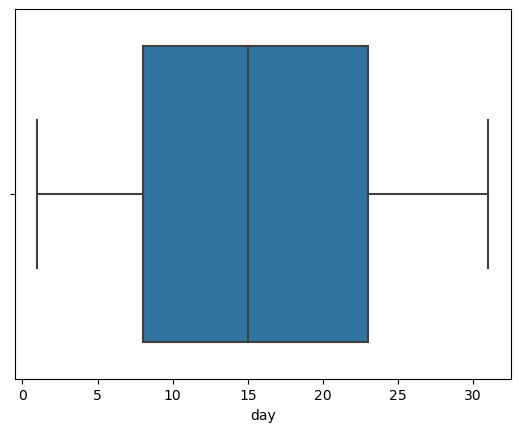

In [28]:
for column in df.select_dtypes(include = ("float64", "int64")).columns: #checking with graphs if it was successful --> it was
    sns.boxplot(df.select_dtypes(include = ("float64", "int64"))[column])
    plt.show()

In [29]:
df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
day                              0
dtype: int64

In [30]:
#numericals after removing outliers

In [31]:
num_df = df.select_dtypes(include = ("float64", "int64"))
num_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day
0,2763.519279,56274,69,32,5,0,1,384.811147,24
2,12887.431650,48767,108,18,38,0,2,566.472247,19
3,7645.861827,0,106,18,65,0,7,529.881344,20
4,2813.692575,43836,73,12,44,0,1,138.130879,3
5,8256.297800,62902,69,14,94,0,2,159.383042,25


In [32]:
num_df["number_of_open_complaints"].value_counts() #after removing outliers , the remaining rows only got zero

0    5888
Name: number_of_open_complaints, dtype: int64

In [33]:
# So i will drop number of open complaints from the num dataframe
num_df = num_df.drop(["number_of_open_complaints"], axis = 1)
num_df                     

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount,day
0,2763.519279,56274,69,32,5,1,384.811147,24
2,12887.431650,48767,108,18,38,2,566.472247,19
3,7645.861827,0,106,18,65,7,529.881344,20
4,2813.692575,43836,73,12,44,1,138.130879,3
5,8256.297800,62902,69,14,94,2,159.383042,25
...,...,...,...,...,...,...,...,...
9127,5032.165498,66367,64,6,48,3,307.200000,12
9128,4100.398533,47761,104,16,58,1,541.282007,6
9130,3096.511217,21604,79,14,28,1,379.200000,12
9132,7524.442436,21941,96,34,3,3,691.200000,3


In [34]:
# checking for multicollinearity

In [35]:
num_corr = num_df.corr()
num_corr = round(num_corr,2)
num_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount,day
customer_lifetime_value,1.00,0.04,0.42,-0.03,-0.01,0.25,0.16,-0.01
income,0.04,1.00,-0.01,-0.03,0.01,-0.01,-0.39,-0.05
monthly_premium_auto,0.42,-0.01,1.00,-0.03,-0.00,-0.02,0.45,0.00
months_since_last_claim,-0.03,-0.03,-0.03,1.00,-0.04,0.01,-0.03,0.02
months_since_policy_inception,-0.01,0.01,-0.00,-0.04,1.00,0.00,-0.03,-0.02
number_of_policies,0.25,-0.01,-0.02,0.01,0.00,1.00,-0.01,0.00
total_claim_amount,0.16,-0.39,0.45,-0.03,-0.03,-0.01,1.00,0.02
day,-0.01,-0.05,0.00,0.02,-0.02,0.00,0.02,1.00


<Figure size 10000x10000 with 0 Axes>

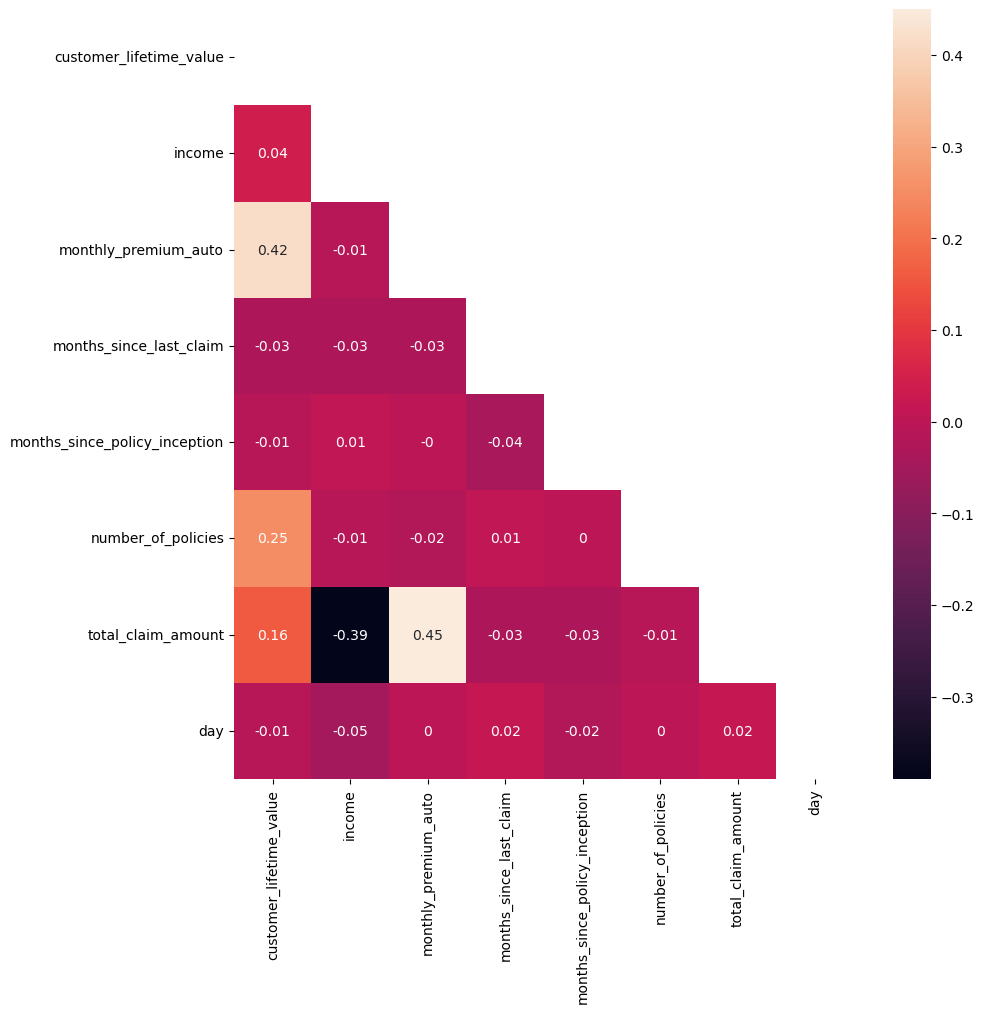

In [36]:
plt.figure(figsize=(100,100))

mask = np.zeros_like(num_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(num_corr, mask=mask, annot=True)
plt.show()

In [37]:
# no multicollinearity --> i won't drop any columns

In [38]:
# categoricals after removing outliers

In [39]:
cat_df = df.select_dtypes(include = "object")
cat_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [40]:
# divide categorical variables into ordinal and not ordinal

In [41]:
cat_df["employmentstatus"].value_counts()

Employed         3737
Unemployed       1406
Medical Leave     282
Disabled          282
Retired           181
Name: employmentstatus, dtype: int64

In [42]:
cat_df["location_code"].value_counts()

Suburban    3625
Rural       1175
Urban       1088
Name: location_code, dtype: int64

In [43]:
cat_df["vehicle_size"].value_counts()

Medsize    4140
Small      1136
Large       612
Name: vehicle_size, dtype: int64

In [44]:
# One hot to state
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class

# Ordinal to coverage check
# Ordinal to employmentstatus
# Ordinal to location code
# Ordinal vehicle size

cat_df["coverage"] = cat_df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
cat_df["employmentstatus"] = cat_df["employmentstatus"].map({"Retired" : 0, "Disabled" : 1, "Medical Leave" : 2, "Unemployed" : 3, "Employed" : 4})
cat_df["location_code"] = cat_df["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
cat_df["vehicle_size"] = cat_df["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})



In [45]:
cat_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0,Bachelor,4,F,0,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,1
2,Nevada,No,2,Bachelor,4,F,0,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,1
3,California,No,0,Bachelor,3,M,0,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,1
4,Washington,No,0,Bachelor,4,M,1,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,1
5,Oregon,Yes,0,Bachelor,4,F,1,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,1


In [46]:
# 2. Create a copy of the dataframe for the data wrangling.

In [47]:
customer_df1 = customer_df.copy()
customer_df1.head(1)

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24


In [49]:
num_df.head(1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount,day
0,2763.519279,56274,69,32,5,1,384.811147,24


In [48]:
# creating one with only discrete variables

In [50]:
disc_var =  num_df.drop(["customer_lifetime_value","total_claim_amount"], axis = 1)
disc_var.head(1)

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,day
0,56274,69,32,5,1,24


In [51]:
# creating one dataframe with continous variables. 
# I will not include total_claim_amount because it is going to be our target and i dont want to normalize it
cont_var = pd.DataFrame(num_df["customer_lifetime_value"])
cont_var.head()

,customer_lifetime_value
0,2763.519279
2,12887.431650
3,7645.861827
4,2813.692575
5,8256.297800


In [52]:
# 3. Normalize the continuous variables. 

In [53]:
transformer = MinMaxScaler().fit(cont_var) 
x_minmax = transformer.transform(cont_var) 
print(x_minmax.shape)

(5888, 1)


In [54]:
cont_var_norm = pd.DataFrame(x_minmax, index = df.index, columns = cont_var.columns)
cont_var_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5888 entries, 0 to 9133
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_lifetime_value  5888 non-null   float64
dtypes: float64(1)
memory usage: 92.0 KB


In [55]:
cont_var_norm.head()

,customer_lifetime_value
0,0.053337
2,0.755758
3,0.392086
4,0.056818
5,0.434439


In [ ]:
# 4. Encode the categorical variables (dividing between ordinal and not ordinal)

In [56]:
# Ordinal : coverage , employmentstatus, location code vehicle size
cat_ord = cat_df[["coverage","employmentstatus","location_code","vehicle_size"]]
cat_ord.head()

,coverage,employmentstatus,location_code,vehicle_size
0,0,4,0,1
2,2,4,0,1
3,0,3,0,1
4,0,4,1,1
5,0,4,1,1


In [57]:
cat_normal = cat_df.drop(["coverage","employmentstatus","location_code","vehicle_size"], axis = 1)
cat_normal.head()

,state,response,education,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,No,Bachelor,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
2,Nevada,No,Bachelor,F,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,California,No,Bachelor,M,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,Washington,No,Bachelor,M,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car
5,Oregon,Yes,Bachelor,F,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car


In [58]:
cat_dumm = pd.get_dummies(cat_normal, drop_first = True)
cat_dumm.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [62]:
# now i have concat numerical (discrete and continuous without total claim amount), 
# then with categorical (ordinal and not ordinal)
all_conc = pd.concat([disc_var , cont_var_norm ,cat_ord, cat_dumm],  axis = 1)
all_conc.head(1)

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,day,customer_lifetime_value,coverage,employmentstatus,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,56274,69,32,5,1,24,0.053337,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [63]:
# 6. Since the model will only accept numerical data, check and make sure that every column is numerical,
# if some are not, change it using encoding. --> checked it below

In [64]:
all_conc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5888 entries, 0 to 9133
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   income                          5888 non-null   int64  
 1   monthly_premium_auto            5888 non-null   int64  
 2   months_since_last_claim         5888 non-null   int64  
 3   months_since_policy_inception   5888 non-null   int64  
 4   number_of_policies              5888 non-null   int64  
 5   day                             5888 non-null   int64  
 6   customer_lifetime_value         5888 non-null   float64
 7   coverage                        5888 non-null   int64  
 8   employmentstatus                5888 non-null   int64  
 9   location_code                   5888 non-null   int64  
 10  vehicle_size                    5888 non-null   int64  
 11  state_California                5888 non-null   uint8  
 12  state_Nevada                    58

In [65]:
all_conc.isna().sum()

income                            0
monthly_premium_auto              0
months_since_last_claim           0
months_since_policy_inception     0
number_of_policies                0
day                               0
customer_lifetime_value           0
coverage                          0
employmentstatus                  0
location_code                     0
vehicle_size                      0
state_California                  0
state_Nevada                      0
state_Oregon                      0
state_Washington                  0
response_Yes                      0
education_College                 0
education_Doctor                  0
education_High School or Below    0
education_Master                  0
gender_M                          0
marital_status_Married            0
marital_status_Single             0
policy_type_Personal Auto         0
policy_type_Special Auto          0
policy_Corporate L2               0
policy_Corporate L3               0
policy_Personal L1          

In [66]:
all_conc.shape

(5888, 42)

In [67]:
# Now this is not part of the lab , just did it to experiment

In [68]:
#X y split
X = all_conc
y = df["total_claim_amount"]

In [69]:
X

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,day,customer_lifetime_value,coverage,employmentstatus,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,56274,69,32,5,1,24,0.053337,0,4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,48767,108,18,38,2,19,0.755758,2,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,106,18,65,7,20,0.392086,0,3,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,43836,73,12,44,1,3,0.056818,0,4,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,62902,69,14,94,2,25,0.434439,0,4,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,66367,64,6,48,3,12,0.210741,0,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
9128,47761,104,16,58,1,6,0.146093,2,4,0,2,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
9130,21604,79,14,28,1,12,0.076441,1,4,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9132,21941,96,34,3,3,3,0.383661,1,4,0,2,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


In [70]:
# train test split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [72]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [73]:
pred = model.predict(X_test)
pred.shape

(1767,)

In [74]:
r2 = r2_score(y_test, pred)
RMSE = mean_squared_error(y_test, pred, squared=False)
MSE = mean_squared_error(y_test, pred)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.5101446189252552
RMSE =  145.17496075841785
MSE =  21075.769231208164


In [75]:
adj_r2 = (1 - (1 - r2) * ((X.shape[0] - 1) / 
          (X.shape[0] - X.shape[1] - 1)))
adj_r2

0.5066247000193289

In [76]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = pred
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
5854,350.689559,120.325135,230.364424
4886,528.000000,556.981187,28.981187
7411,112.425578,239.437688,127.012110
8188,20.521312,269.365872,248.844560
870,392.235698,260.031998,132.203700
...,...,...,...
492,528.000000,607.936124,79.936124
487,662.400000,570.683175,91.716825
4004,318.866388,298.605301,20.261087
9068,432.000000,526.535355,94.535355


In [77]:
results.sort_values('diff', ascending=False).head(10)

,true,pred,diff
3981,32.978158,585.152224,552.174066
7275,46.098963,562.497803,516.398840
3948,905.699717,419.424747,486.274970
6688,77.129691,563.393062,486.263371
4036,863.909989,381.239565,482.670424
1453,46.104534,524.074871,477.970337
8379,41.139806,504.997758,463.857952
5942,4.237520,466.980589,462.743069
3591,43.098747,493.160498,450.061751
6998,30.989755,477.780727,446.790972


<AxesSubplot:xlabel='true', ylabel='pred'>

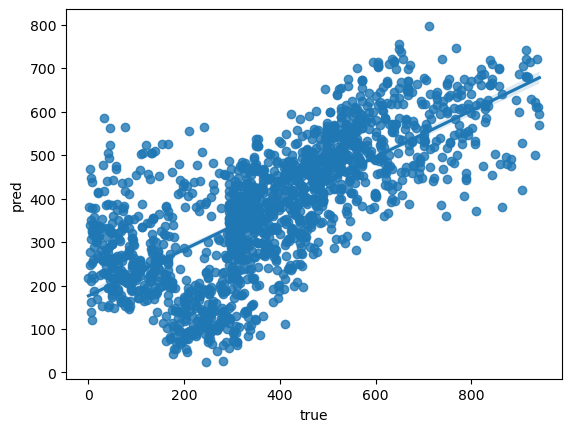

In [78]:
sns.regplot(results['true'], results['pred'])